In [0]:
!pip install kaggle-cli


In [0]:
!unzip -q train.zip
!unzip -q labels.csv.zip

In [0]:
import os
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
data=pd.read_csv("labels.csv")
asa=train_test_split(data)
os.mkdir("dog_train")
os.mkdir("dog_test")

def num2str(cls,nm):
    nms="%s.%s"%(cls,nm)
    return nms
asa1=np.array(asa[0])
asa2=np.array(asa[1])

for i in asa1:
    try:
        os.mkdir("dog_train/"+i[1])
    except:
        pass
for i in asa2:
    try:
        os.mkdir("dog_test/"+i[1])
    except:
        pass
for i in asa1:
    try:
        lnz=len(os.listdir('dog_train/'+i[1]))+1
        dg_nm=num2str(i[1],lnz)
        os.rename('train/'+i[0]+'.jpg','dog_train/'+i[1]+'/'+dg_nm+'.jpg')
    #        os.rename('train/train/'+i[0]+'.jpg','dog_train/'+i[1]+'/'+i[0]+'.jpg')
    except:
        print(i)
        pass
for i in asa2:
    try:
        lnz=len(os.listdir('dog_test/'+i[1]))+1
        dg_nm=num2str(i[1],lnz)
        os.rename('train/'+i[0]+'.jpg','dog_test/'+i[1]+'/'+dg_nm+'.jpg')
    #        os.rename('train/train/'+i[0]+'.jpg','dog_train/'+i[1]+'/'+i[0]+'.jpg')
    except:
        print(i)
        pass            

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)



img_height = img_width = 224
channels = 3
train_generator = train_datagen.flow_from_directory(
    'dog_train/',
    color_mode = "rgb",
    target_size=(img_height, img_width),
    batch_size = 32,class_mode = 'categorical')


test_datagen = ImageDataGenerator(
        rescale=1./255)

channels = 3
test_generator = test_datagen.flow_from_directory(
    'dog_test/',
    color_mode = "rgb",
    target_size=(img_height, img_width),
    batch_size = 32,class_mode = 'categorical')

Using TensorFlow backend.


Found 7666 images belonging to 120 classes.
Found 2556 images belonging to 120 classes.


In [5]:
ls

datalab/  dog_test/  dog_train/  labels.csv  labels.csv.zip  train/  train.zip


In [0]:
from keras.applications import VGG19
from keras.preprocessing import image
from keras.layers import Input, Flatten, Dense, Add
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dropout
from keras import optimizers

In [3]:
shapes=(224, 224, 3)
image_input = Input(shape=(224, 224, 3))
num_classes=120
model = VGG19(input_tensor=image_input, include_top=False,weights='imagenet',pooling='avg')

80142336/80134624 [==============================] - 4s 0us/step


In [8]:

image_input=Input(shape=(224,224,3))
from keras.layers.normalization import BatchNormalization
from keras.applications import ResNet50, xception
# model_res = ResNet50(input_tensor=image_input, include_top=False,weights='imagenet',pooling='avg')
model_x=xception.Xception(input_tensor=image_input, include_top=False,weights='imagenet',pooling='avg')

83689472/83683744 [==============================] - 1s 0us/step


In [0]:
model_x.summary()

In [0]:
num_classes=120
x = model_x.output
x = Dense(2048, activation='relu', name='fc11')(x)
x = Dropout(0.5)(x)
x = Dense(2048, activation='relu', name='fc12')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax', name='predictions')(x)

combinedmodel = Model(inputs= [model_x.input], outputs= x )

for layer in model_x.layers:
    layer.trainable = False
    
combinedmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
combinedmodel.summary()

In [12]:
from keras.callbacks import ModelCheckpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
batch_size=16
combinedmodel.fit_generator(
        train_generator,
        steps_per_epoch=7666 // batch_size,
        epochs=30,
        validation_data=test_generator,
        validation_steps=2556 // batch_size,callbacks=callbacks_list)
combinedmodel.save_weights('first_try.h5')

Epoch 1/30
479/479 [==============================] - 340s 711ms/step - loss: 2.3220 - acc: 0.4385 - val_loss: 1.4093 - val_acc: 0.6991

Epoch 00001: val_acc improved from -inf to 0.69906, saving model to weights-improvement-01-0.70.hdf5
Epoch 2/30
168/479 [=========>....................] - ETA: 2:58 - loss: 1.5855 - acc: 0.5835

479/479 [==============================] - 335s 700ms/step - loss: 1.5666 - acc: 0.5917 - val_loss: 1.5393 - val_acc: 0.7052

Epoch 00002: val_acc improved from 0.69906 to 0.70515, saving model to weights-improvement-02-0.71.hdf5
Epoch 3/30
230/479 [=============>................] - ETA: 2:23 - loss: 1.4850 - acc: 0.6054

479/479 [==============================] - 336s 701ms/step - loss: 1.4592 - acc: 0.6153 - val_loss: 1.4109 - val_acc: 0.7185

Epoch 00003: val_acc improved from 0.70515 to 0.71853, saving model to weights-improvement-03-0.72.hdf5
Epoch 4/30
246/479 [==============>...............] - ETA: 2:12 - loss: 1.3837 - acc: 0.6335

479/479 [==============================] - 334s 698ms/step - loss: 1.3634 - acc: 0.6395 - val_loss: 1.4084 - val_acc: 0.7288

Epoch 00004: val_acc improved from 0.71853 to 0.72876, saving model to weights-improvement-04-0.73.hdf5
Epoch 5/30
250/479 [==============>...............] - ETA: 2:11 - loss: 1.3135 - acc: 0.6581

479/479 [==============================] - 335s 700ms/step - loss: 1.2988 - acc: 0.6599 - val_loss: 1.4282 - val_acc: 0.7282

Epoch 00005: val_acc did not improve
Epoch 6/30
318/479 [==================>...........] - ETA: 1:31 - loss: 1.2592 - acc: 0.6693

479/479 [==============================] - 333s 695ms/step - loss: 1.2640 - acc: 0.6676 - val_loss: 1.3692 - val_acc: 0.7380

Epoch 00006: val_acc improved from 0.72876 to 0.73800, saving model to weights-improvement-06-0.74.hdf5
Epoch 7/30
268/479 [===============>..............] - ETA: 1:59 - loss: 1.2440 - acc: 0.6721

479/479 [==============================] - 331s 692ms/step - loss: 1.2366 - acc: 0.6735 - val_loss: 1.4628 - val_acc: 0.7319

Epoch 00007: val_acc did not improve
Epoch 8/30
324/479 [===================>..........] - ETA: 1:27 - loss: 1.1706 - acc: 0.6912

479/479 [==============================] - 330s 690ms/step - loss: 1.1713 - acc: 0.6910 - val_loss: 1.4339 - val_acc: 0.7152

Epoch 00008: val_acc did not improve
Epoch 9/30
342/479 [====================>.........] - ETA: 1:17 - loss: 1.1575 - acc: 0.6991

479/479 [==============================] - 332s 693ms/step - loss: 1.1577 - acc: 0.7006 - val_loss: 1.5127 - val_acc: 0.7284

Epoch 00009: val_acc did not improve
Epoch 10/30
346/479 [====================>.........] - ETA: 1:14 - loss: 1.1324 - acc: 0.7041

479/479 [==============================] - 330s 688ms/step - loss: 1.1265 - acc: 0.7052 - val_loss: 1.5245 - val_acc: 0.7272

Epoch 00010: val_acc did not improve
Epoch 11/30
347/479 [====================>.........] - ETA: 1:15 - loss: 1.1325 - acc: 0.7085

479/479 [==============================] - 332s 694ms/step - loss: 1.1183 - acc: 0.7115 - val_loss: 1.5682 - val_acc: 0.7229

Epoch 00011: val_acc did not improve
Epoch 12/30
348/479 [====================>.........] - ETA: 1:13 - loss: 1.0717 - acc: 0.7188

479/479 [==============================] - 331s 692ms/step - loss: 1.0789 - acc: 0.7182 - val_loss: 1.4647 - val_acc: 0.7244

Epoch 00012: val_acc did not improve
Epoch 13/30
348/479 [====================>.........] - ETA: 1:14 - loss: 1.0904 - acc: 0.7198

479/479 [==============================] - 331s 691ms/step - loss: 1.0832 - acc: 0.7205 - val_loss: 1.4811 - val_acc: 0.7191

Epoch 00013: val_acc did not improve
Epoch 14/30
348/479 [====================>.........] - ETA: 1:13 - loss: 1.0356 - acc: 0.7356

479/479 [==============================] - 329s 688ms/step - loss: 1.0439 - acc: 0.7327 - val_loss: 1.4683 - val_acc: 0.7274

Epoch 00014: val_acc did not improve
Epoch 15/30
348/479 [====================>.........] - ETA: 1:13 - loss: 1.0443 - acc: 0.7304

479/479 [==============================] - 328s 685ms/step - loss: 1.0507 - acc: 0.7277 - val_loss: 1.4066 - val_acc: 0.7358

Epoch 00015: val_acc did not improve
Epoch 16/30
348/479 [====================>.........] - ETA: 1:12 - loss: 1.0146 - acc: 0.7355

479/479 [==============================] - 328s 684ms/step - loss: 1.0317 - acc: 0.7335 - val_loss: 1.5239 - val_acc: 0.7252

Epoch 00016: val_acc did not improve
Epoch 17/30
348/479 [====================>.........] - ETA: 1:13 - loss: 0.9818 - acc: 0.7426

479/479 [==============================] - 329s 688ms/step - loss: 0.9822 - acc: 0.7437 - val_loss: 1.4728 - val_acc: 0.7236

Epoch 00017: val_acc did not improve
Epoch 18/30
348/479 [====================>.........] - ETA: 1:13 - loss: 0.9891 - acc: 0.7430

479/479 [==============================] - 331s 690ms/step - loss: 0.9972 - acc: 0.7428 - val_loss: 1.5116 - val_acc: 0.7205

Epoch 00018: val_acc did not improve
Epoch 19/30
348/479 [====================>.........] - ETA: 1:14 - loss: 1.0017 - acc: 0.7427

479/479 [==============================] - 332s 693ms/step - loss: 1.0085 - acc: 0.7426 - val_loss: 1.5430 - val_acc: 0.7142

Epoch 00019: val_acc did not improve
Epoch 20/30
348/479 [====================>.........] - ETA: 1:13 - loss: 1.0292 - acc: 0.7437

479/479 [==============================] - 329s 687ms/step - loss: 1.0121 - acc: 0.7474 - val_loss: 1.5363 - val_acc: 0.7234

Epoch 00020: val_acc did not improve
Epoch 21/30
348/479 [====================>.........] - ETA: 1:13 - loss: 1.0072 - acc: 0.7473

479/479 [==============================] - 330s 688ms/step - loss: 1.0020 - acc: 0.7480 - val_loss: 1.4893 - val_acc: 0.7352

Epoch 00021: val_acc did not improve
Epoch 22/30
348/479 [====================>.........] - ETA: 1:13 - loss: 0.9462 - acc: 0.7599

479/479 [==============================] - 331s 692ms/step - loss: 0.9676 - acc: 0.7573 - val_loss: 1.5626 - val_acc: 0.7231

Epoch 00022: val_acc did not improve
Epoch 23/30
348/479 [====================>.........] - ETA: 1:13 - loss: 0.9559 - acc: 0.7575

479/479 [==============================] - 330s 688ms/step - loss: 0.9518 - acc: 0.7587 - val_loss: 1.6171 - val_acc: 0.7168

Epoch 00023: val_acc did not improve
Epoch 24/30
348/479 [====================>.........] - ETA: 1:13 - loss: 0.9442 - acc: 0.7644

479/479 [==============================] - 330s 689ms/step - loss: 0.9368 - acc: 0.7663 - val_loss: 1.6393 - val_acc: 0.7223

Epoch 00024: val_acc did not improve
Epoch 25/30
348/479 [====================>.........] - ETA: 1:12 - loss: 0.9361 - acc: 0.7642

479/479 [==============================] - 325s 680ms/step - loss: 0.9365 - acc: 0.7633 - val_loss: 1.6078 - val_acc: 0.7197

Epoch 00025: val_acc did not improve
Epoch 26/30
348/479 [====================>.........] - ETA: 1:13 - loss: 0.9334 - acc: 0.7711

479/479 [==============================] - 328s 685ms/step - loss: 0.9427 - acc: 0.7697 - val_loss: 1.5481 - val_acc: 0.7260

Epoch 00026: val_acc did not improve
Epoch 27/30
348/479 [====================>.........] - ETA: 1:12 - loss: 0.9449 - acc: 0.7697

479/479 [==============================] - 327s 682ms/step - loss: 0.9350 - acc: 0.7721 - val_loss: 1.5466 - val_acc: 0.7242

Epoch 00027: val_acc did not improve
Epoch 28/30
348/479 [====================>.........] - ETA: 1:11 - loss: 0.9422 - acc: 0.7750

479/479 [==============================] - 324s 676ms/step - loss: 0.9312 - acc: 0.7719 - val_loss: 1.5903 - val_acc: 0.7209

Epoch 00028: val_acc did not improve
Epoch 29/30
348/479 [====================>.........] - ETA: 1:12 - loss: 0.9160 - acc: 0.7813

479/479 [==============================] - 325s 679ms/step - loss: 0.9291 - acc: 0.7771 - val_loss: 1.6517 - val_acc: 0.7262

Epoch 00029: val_acc did not improve
Epoch 30/30
348/479 [====================>.........] - ETA: 1:10 - loss: 0.9455 - acc: 0.7742

479/479 [==============================] - 318s 664ms/step - loss: 0.9505 - acc: 0.7718 - val_loss: 1.5245 - val_acc: 0.7173

Epoch 00030: val_acc did not improve


In [13]:
ls -l 

total 1740196
drwxr-xr-x   1 root root      4096 Mar 13 21:48 datalab/
drwxr-xr-x 122 root root      4096 Apr 12 07:22 dog_test/
drwxr-xr-x 122 root root      4096 Apr 12 07:22 dog_train/
-rw-r--r--   1 root root 118323288 Apr 12 10:12 first_try.h5
-rw-r--r--   1 root root    482063 Sep 28  2017 labels.csv
-rw-r--r--   1 root root    218954 Apr 12 07:21 labels.csv.zip
drwxr-xr-x   2 root root    655360 Sep 28  2017 test/
-rw-r--r--   1 root root 362738853 Apr 12 10:15 test.zip
drwxr-xr-x   2 root root    643072 Apr 12 07:22 train/
-rw-r--r--   1 root root 361279070 Apr 12 07:21 train.zip
-rw-r--r--   1 root root 187516376 Apr 12 07:32 weights-improvement-01-0.70.hdf5
-rw-r--r--   1 root root 187516376 Apr 12 07:38 weights-improvement-02-0.71.hdf5
-rw-r--r--   1 root root 187516376 Apr 12 07:43 weights-improvement-03-0.72.hdf5
-rw-r--r--   1 root root 187516376 Apr 12 07:49 weights-improvement-04-0.73.hdf5
-rw-r--r--   1 root root 187516376 Apr 12 08:00 weights-improvement-06-0.74.hdf5


In [0]:
class_names=train_generator.class_indices
dog_classes={}

for i in class_names.keys():
  dog_classes[class_names[i]]=i

In [2]:
!pip install kaggle-cli
#download ttest
!unzip -q test.zip

    100% |████████████████████████████████| 81kB 2.6MB/s 
    100% |████████████████████████████████| 5.3MB 250kB/s 
    100% |████████████████████████████████| 51kB 9.1MB/s 
  Using cached https://files.pythonhosted.org/packages/e1/ba/f95e3ec83f93919b1437028e989cf3fa5ff4f5cae4a1f62255f71deddb5b/pbr-4.0.2-py2.py3-none-any.whl
  Running setup.py bdist_wheel for kaggle-cli ... - \ done
  Stored in directory: /content/.cache/pip/wheels/d5/bb/10/c1dd1b08c7433c943cb55c46367ae3f891415e8a37300ff8a7


  Running setup.py bdist_wheel for cliff ... - \ done
  Stored in directory: /content/.cache/pip/wheels/50/00/6d/d4aeb5ccdd47dd76800592b26f943e4959bc705b2d4e6e54e1
  Running setup.py bdist_wheel for configparser ... - done
  Stored in directory: /content/.cache/pip/wheels/a3/61/79/424ef897a2f3b14684a7de5d89e8600b460b89663e6ce9d17c
  Running setup.py bdist_wheel for PrettyTable ... - done
  Stored in directory: /content/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Running setup.py bdist_wheel for pyperclip ... - done
  Stored in directory: /content/.cache/pip/wheels/a7/68/ef/ab1ef01625334f10a979e9fe5ef79e1c4fd4cdf4b710a0067b
Successfully built kaggle-cli cliff configparser PrettyTable pyperclip
downloading https://www.kaggle.com/c/dog-breed-identification/download/test.zip

test.zip  69% |#########################            | ETA:  0:00:03  34.9 MiB/s

test.zip 100% |#####################################| Time: 0:00:09  35.6 MiB/s



In [16]:
combinedmodel

In [0]:
import os
test_img_list=os.listdir('test/')

In [8]:
for i in test_img_list:
  print(i)

079e0634a90b3de0e5c799dda0ca8fd3.jpg
c9629271409541d68f1c2c35b6d8133f.jpg
e6999e18a8e98f7fc33cf520d26ec521.jpg
25dd9f73f713ad472d95697253018e7a.jpg
ca113721843e1a2729c11dd421891263.jpg
6a233c5a65963dd34a371083d0e016d3.jpg
d0a26276f2d5dfb96fb797804092b144.jpg
f02b0bb575f8dd86c63ab38df20483ba.jpg
d5e7ba067d315d6c965a0d8ed2de1238.jpg
1a491a66f5972d12b68a33df4c22f1ea.jpg
cac89d903808e3593a80b267162723f1.jpg
23df0336ab3f54104f8702bd9d8e4cbb.jpg
0d5b801bfeff4eefb3994b8fc59bc2ff.jpg
e292584f17fa7cea7f95bdadecde0ebb.jpg
b00081f031f0b6a462f83a3a6f52b55e.jpg
138aaaa3ad8bdee8167bda4ba8dd3875.jpg
83c460987e9710cb8c18e63de88bb536.jpg
73489d42ced243039b7f2778d0859e62.jpg
ef5f1eb55d91360df896824ac4cc979b.jpg
b3ce3ccf5096e1c894595bb1f3b467ed.jpg
329b1ef3e91e807eb6135475ee947e30.jpg
69c0a9403f5e6562f9de8bde922a4ad5.jpg
07a61998ec9044e9c977274476e07681.jpg
a70b4edc3052ca4ada4b3731771345f7.jpg
198e2b278564ef250a5a332ffd1b6189.jpg
572031649ae84a1efa882169fc6e1e86.jpg
6280a706538f2eb9821ea13325f13509.jpg
5


448b68da1ea92511cdd0cbcb2efaeb2e.jpg
abca200d65a12105f7eeef85d4cef448.jpg
3aa91929bc1ef5552e1e3259b2e7ea50.jpg
b7cb1a73a6512faf62c025ef9c4e6204.jpg
994a730fe1c2a1860bf9aff7b8789450.jpg
25388b6d6833aab10a08588599ab92eb.jpg
13cce51b2d667bdf3f05beb9a64be795.jpg
f9774f126def6f6c167e15ec1da6b345.jpg
5e9b8fa5bc42071cc7e419341fcd7a7a.jpg
a940379e403d5fd0d85f79731544ea2c.jpg
97b52c9b094e6e8a978565d8eb78db75.jpg
1d115c77c5bd71c310412bae7d322410.jpg
07d9d2f42eb35dd4d84b184abc4e8412.jpg
65a336218af7030aa51bcadb9b757316.jpg
32933a3ae73abb7a83493563eb1ce364.jpg
9e79894541d431090f567739eda19dac.jpg
0cc2a9144cd3a2292a108a28d68c17fe.jpg
51867b410e482102250c3f1e6bb1684b.jpg
2d46b010d81824d286b1ffcaa7495609.jpg
297517505e03ecbbcff2039bfe14e56a.jpg
25d0ef34c87dbdf118fb714f0bc3e59b.jpg
5b8fe1b3769460952465a296e6f5b53a.jpg
7586e72c940293cdda507e5e40c8af65.jpg
b8a095f820b34a9f102b4cbb0c747528.jpg
834bb31410410852082813d2e07c3290.jpg
fe646cdb7b5f1e8e7dc704e8db436043.jpg
e93dde9e36ff6a41cd0e72fb01703be6.jpg



83f7f80b0c93b5024b8c30949ee8cf8d.jpg
b9069ec6fa5f9a3e9c6193398df6cc71.jpg
fb05fd17b96a9d33288691701da2dffd.jpg
34b6828907694d124d5adf914baef487.jpg
9eea61fd6a1df05ec18e53edaa54b66d.jpg
c0135fc7aa154a17bfe4f626e9dd88a8.jpg
d524e1319b967c4e111b2ff4c75c5959.jpg
3a846286a07c0345ed0b023b94b8f012.jpg
f929dc14403b317454be39940c6ef36f.jpg
75827e84c126a80c51711ebcb0872d14.jpg
f09c01de47c096fe62cd1398798c1369.jpg
00bbfaa5b2bff32a3dc8ce1563e484a3.jpg
11536b27e26da85d43fe32f3b5e03d55.jpg
174e1bc31c5da607dda786cc43eeaa50.jpg
01f3be56aaa63fb47fd576a17f1f60b6.jpg
efdd2006f173de50417a1a9ee170194b.jpg
1bff026e041df7da298b1518d598f52e.jpg
5260753fe46c94c4202edc54278f9df2.jpg
2d8b78d291ba57b21c1893e1a6489dbb.jpg
7bf38cfc0a1dd42f62f45bc6978a0c8f.jpg
74d2b7992b831108009f6aeb36fb9181.jpg
7611c6281dd2c785743fc0fc47c165fc.jpg
1de0cc1a40046bcb58400263159597db.jpg
5eb88b83b9d6753dbc5c55690b97a3de.jpg
74a50646dfd99459faf8c1a626c53795.jpg
67f6f60d65786b06088ea55277a3097c.jpg
3d389d6c8f70a5623445c9f40d57789d.jpg



1b3430ea690fb874e20f814ec994821a.jpg
84e3a6a1d53e886d97f65411489969f0.jpg
f681821203c5ff0a675b6f998767e4ab.jpg
8913db55e9966d331e7759f748e2abef.jpg
dea92807aa2ac37bbc2dabf1b0eb6a39.jpg
430a0714247557573bdd9dabb2b02464.jpg
573e9e83d7f64f23f038542ca719d793.jpg
5aa6fc506e8c09fa185cf2ed6a5a64b8.jpg
145e1b4570fd32057e82c8d5754576e5.jpg
00c610a43b661e4fc612d06db96ce258.jpg
1d596c67034a4800558d8a288a812958.jpg
4c9daae07b3b3ed5d5e8920e54b21176.jpg
9cd261b6eff68ddea2ddaadf2608c124.jpg
5cac7c9650f5532dd30bcb247ef34d5d.jpg
903c4482b966c733f4697e5ddc444d92.jpg
438c0bf05096382172a77995a2ba4778.jpg
42c4b276050f8d049f035742650363b1.jpg
666903be1f20886e5b3186179fcbdfd1.jpg
ec24efc47314fd121b67155b56eabccf.jpg
1e7553c33e4b4ee3348f26e7ee63f867.jpg
b4d2fb4fa6688e5f5d67b5296c1b056d.jpg
22dfa94e131e840a76e4961c3455004b.jpg
98a81ff7d67383c57947b40a3e08c593.jpg
5b740ce2798960cfb057bb7b08e2cc51.jpg
00a558277e1f03b71d8c813e03344ddf.jpg
621a8318e9961eea339104847190344f.jpg
7e4e9d4c1718e5d5dba54cbb3d7fc692.jpg


a7f2a6441ab0968a536a93f635640f3f.jpg
e5fa615e36dc3b2b3f554aa5097a6ece.jpg
442057a3142f4d75a1023db363e2fb54.jpg
88d23b246d593dff5ea91d0e07408384.jpg
f46c9b6ddea9aa7ff685604eec44f67a.jpg
ccbb9dd96ed2b8a635b4389eb85c6c96.jpg
a88cc9ea84b4d12768ece4a34e2c1179.jpg
3453d65e80bfd7f4eb5baf10840b176c.jpg
f5c14e0368f4e364a32d873f7e0aff13.jpg
96e0505c4623a11b8c062f7bc874bde7.jpg
a51c2803972dff8c7fcc17f6b7eda64d.jpg
33dbae629a6dbea862671b1b47dbd10e.jpg
54b615d1fb355de9901bdc97d43f824c.jpg
b69fc1ac12eda09347734fe88666a5f5.jpg
6995f85735beeb589cc705419e9e9fcd.jpg
80d3965e4e0a9e300bcba28b1e8a62a1.jpg
371cc67c8675a767b03c9cf8b4c6ab61.jpg
127d5024643ecc0734ea9c2c8c8cbf19.jpg
dd8d95720349f85d2a795adaafc71172.jpg
1cb979e6c2f03ac6f708bcb7f0afb1e0.jpg
e9c38696d381e66971cc328e767fad27.jpg
8a35dc48384df0b36655c328913c00e6.jpg
07ec68dd37d6b9f89e551820f5ca946f.jpg
cd20118a162237be1423e800a6e5094e.jpg
d87b1b285f9435c17e490d391a2b0e21.jpg
6c48992c680be488b94e3c9a0da7e47a.jpg
0f21800e7f10cc35725b82d34da94ce8.jpg
9

d073c9cffe0cf5d1d9d0862033289f16.jpg
af916dc1674b87297438d7e0be4a5395.jpg
111fb27f743d10119c071278ee65d131.jpg
fb71ea157568f082f0620de5cbc37656.jpg
3503e2f6ee75bfd15d68dd2287946a34.jpg
6ecd61b3fdd49bde94cd7ffd9c85f3ef.jpg
6b73a7245337009f249caef86cdd6e20.jpg
5e75eb058a109d912b19e1b33e03a22b.jpg
5d5ec7782eac56d49de059f156b09ded.jpg
f7e3178f426d312a5a06ee7e012efbec.jpg
d3f35cd21d100eb8c0f84616b3a5476e.jpg
f367d08148f74a726ce8f1a2c4c38e81.jpg
61f1308e0a0e6d434b28f6077daf1292.jpg
e53cb5b42ea1a7700cd294a336890361.jpg
82ddade069436304c8b98fe2b3c4f5ec.jpg
682c6aa940b3f0ecc3e196f4a318a548.jpg
ff9b317696e29ca8cd27da30a896edcd.jpg
61307a91fa0311f071c568faf1a372c3.jpg
469e02aace66bdae82507bfa20a93e9c.jpg
7a23ff98d2a0f7a78c0e23d0d2a7ee88.jpg
d32ac5f690eb971c879f645125954ac7.jpg
8a664cfab6a707829de93defe6e37177.jpg
1e695289bc7e756f59fb40120ba541a7.jpg
05bb6919c2dc679ea70ffc632f68ee2b.jpg
67ed04767d1db6ecee253f8bd49fafd9.jpg
7be6d6a06002dd1256e3cdf728a52736.jpg
d909083d1ab00878fc9ff1f02167170a.jpg
8


fda5966dca2faea2abde49cff453cad8.jpg
f86aa3a7e56a78d9931710865d05632d.jpg
19eb30911450a6314e3875558012f0e6.jpg
5fb134dc248a7b120e4ed4fbf60430bf.jpg
47ed2ace69bf91c170a1e5a944bc51dc.jpg
aeadcc13a259bfce54e89352b432beb0.jpg
53c1c7cdc7fe2332fd90cd0c07a71016.jpg
e7afcce6e45858fc3b294cc5c0b15a53.jpg
e3a55cc9c91da472abbced51d98d6ff6.jpg
b6dbdaf25c9fa3b81529523ca3910c2c.jpg
b57e2f0a958ca47c00dbcb8c0f6ec753.jpg
68683d69e860726fa2c7dc5c281b7ebf.jpg
cf14f9d5a0893a9fcefa7ddfca96311c.jpg
956bf554d9e0f63cd503188f60454531.jpg
0187ee2ec2367ed4fd060cca9681742a.jpg
6fc1463ff84a43f36ebad3084d1b0de9.jpg
901c7d4bd29650685df29e58d959ff27.jpg
704a957148a1dc163174d05187205fab.jpg
efb73fb00c85027773f3bef3dfc6c06b.jpg
6e71947d916bb5f325b43dca40c47984.jpg
511ca6e3539192aa5c8747bb697e0525.jpg
4a6d8068585ad98a072b80b94d24a26d.jpg
67a97d6b72d2fadfb3fbbf29cfdd9eb1.jpg
b7b0553cd3215f530ee06bd126630c3a.jpg
084a88db5888d01ee4cdc4607f461ee5.jpg
39555b7a0c918f7f454678e09b916279.jpg
7c22b58b20e4646fbd1747ce2f183f42.jpg


f2e0d5786be8d06a284ffd09c056f637.jpg
979688044296b16074cea50cf27d5365.jpg
5811aa634093ec78ee24e857540e205c.jpg
f789cfce1b5af285046f91ef48234d0a.jpg
7c02585f77cb0f2b31002e5b4b38a2bd.jpg
1ae58bece7c59da6a8d6b479f4527f3d.jpg
8af1ca9f371b05a8e64d5862830c355c.jpg
5061c78044810067e944e160635f5393.jpg
af75455a4069c518b6a95358e0b48bd6.jpg
df92d68c07ec91b2f67cec77980e00cf.jpg
3fbeb111e0468e8c23f5746738054efa.jpg
53ef70b153e67576e282924876d3f27b.jpg
1ac0f98866f354ca8d0fc30a69b8f62b.jpg
fc28e20d3e3ef312a15b2255e0ba77a6.jpg
8e5882fdc5ffed3c02f05fb8c1add2bb.jpg
0a859b76a52d4fac456653a1d45ddf3d.jpg
68b699d2b6f3a836f3570a923a0b1f0e.jpg
25e131e2fc5ffc3d8391882cb89e7fec.jpg
160b9c3dca1c3031e1e76ffb8ee0a7eb.jpg
14e4f44bf8f6cbdb439c7e230ba12f96.jpg
e406358fe35be30ac65f11936c2a066e.jpg
8e0d7d2c224de1d5716d7a69d7854d06.jpg
6a7c935d30ed7694422f5e74093082ca.jpg
b2527bd2a6ccdf3c931ed26a6fde2724.jpg
a45627424a181ad5c4c3ed4c082247e0.jpg
84fb3c8a96b146acf4a2bf1eef86d208.jpg
0d89ad8385e4871589195df66f386b4b.jpg
f

96a5225629180289e17b942b88c2dc04.jpg
1703181ee84a6931a6d665da5f98d36f.jpg
f3094b103a8d45b2c1026f2d5bb4c687.jpg
08b34271d7d196d13bbeeea99504e099.jpg
a9df6b381744989a5b0f9d7cb95b56e4.jpg
0f133e2a0b51fe16f5bacb8b4a980ae6.jpg
f7266c7c804418bf6ea1f644b4efc33c.jpg
d4f769129f9c415999dc400545af6053.jpg
ff457fb6285b47fc933d0bcf58f87927.jpg
5273d42f02b4715cb93845205995ef64.jpg
63a1aa34a5209888ebb99ba0248dcd31.jpg
11752752be98909829638b08dbc4eb33.jpg
e870a3586332ab83ddd5821fbc882f42.jpg
a22cfc744f11c2133f185123901ea137.jpg
c6a275328bd553179e41c9f017e084ab.jpg
3ca5cc54176c11dfbfdd81d4e5c89fa5.jpg
e2faaf5e760a6189d0980e6355864b4c.jpg
b2fbbb659764d792b523f17cbbd563a1.jpg
3b2f8cbd6fe3f64ce0a7e3f535f70533.jpg
c3bc90f915fe61ddaba580cf3bb7cacf.jpg
1ee2743cfe8952b63b227f5d3206a0c7.jpg
e30a97eb637239e3b15c903529e04800.jpg
4fe4dc464736aef48177cfe2a6bc6a6e.jpg
48a865b32601a719b6748c194c8351bf.jpg
db9df150d00b14415f785b02b84fd463.jpg
ba19a10e93747cf1c55433f860ea33bf.jpg
6cdfcb145c9ecc6d65edf561c43e9aee.jpg
5

In [0]:
from keras.preprocessing import image
import numpy as np
main_data_test=[]
for i in test_img_list:
  img = image.load_img('test/'+i, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = combinedmodel.predict(images)
  main_data_test.append(classes)
  classes = classes.argmax(axis=-1)
  print("{}-{}".format(i,dog_classes[classes[0]]))

In [0]:
import numpy as np
main_data_test=np.array(main_data_test)

In [0]:
import pandas as pd
new_main=np.array([x[0] for x in main_data_test ])

main=pd.DataFrame(new_main)



In [0]:
data_csv=main.to_csv("data_test.csv")

In [1]:
ls -l

total 4
drwxr-xr-x 1 root root 4096 Mar 13 21:48 datalab/


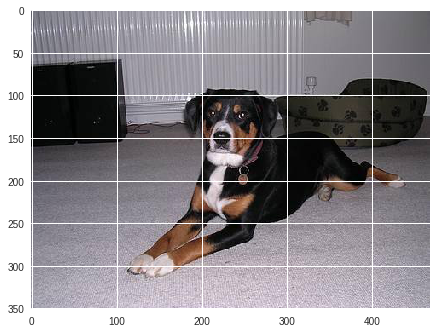

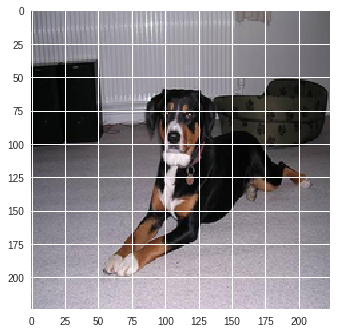

In [19]:

from PIL import Image

img=  Image.open('test/58170d274ef3a93eb6d169ff7eea19c3.jpg')
import matplotlib.pyplot as plt
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()

img = img.resize((224,224), Image.ANTIALIAS)

plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()

In [29]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass


Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Cannot retrieve auth tokens.
Failure("Unexpected error response: {\n  \"error\" : \"invalid_grant\",\n  \"error_description\" : \"Code was already redeemed.\"\n}")


In [31]:
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!mkdir -p drive
!google-drive-ocamlfuse drive

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!cp data_test.csv drive/

In [0]:
ls drive/dat